In [19]:
# Question 1(a)
# Original function:

def func(x):
    if x <= 1:
        return 3
    if 1 < x <= 2:
        return 4-x
    if 2 < x <= 3:
        return 2
    if 3 < x <= 4:
        return 5-x
    return x-3

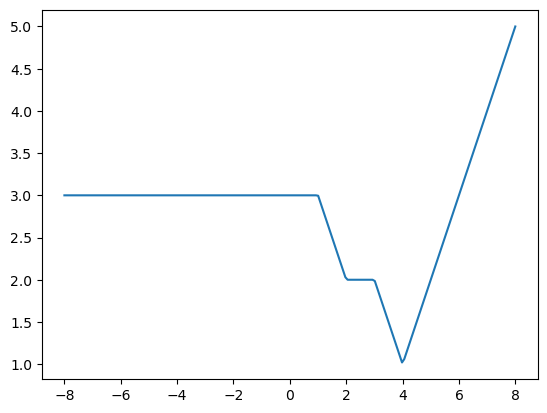

In [20]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-8,8,200)
Y = np.zeros(200) 
for i in range(200):
	Y[i] = func(X[i]) 
plt.plot(X,Y)

In [23]:
# Gradient function: 
def gradf(x):
    if x <= 1:
        return 0 # Derivative of a constant is zero
    if 1 < x <= 2:
        return -1 # Derivative of 4-x is -1
    if 2 < x <= 3:
        return 0 # Derivative of a constant is zero
    if 3 < x <= 4:
        return -1 # Derivative of 5-x is -1
    return 1 # Derivative of x-3 is 1

# 1(b):

# Gradient Descent
def gradient_descent(func, grad_func, initial_point, learning_rate):
    x = initial_point
    prev_x = None
    iterations = 0
    while prev_x is None or abs(x - prev_x) >= 1e-6:
        prev_x = x
        gradient = grad_func(x)
        x = x - learning_rate * gradient
        print(f"Gradient Descent - Iteration {iterations + 1}: x = {x}, func(x) = {func(x)}")
        iterations += 1
    return x

# Gradient Descent with Momentum
def gradient_descent_momentum(func, grad_func, initial_point, learning_rate, momentum_beta):
    x = initial_point
    momentum = 0
    prev_x = None
    iterations = 0
    while prev_x is None or abs(x - prev_x) >= 1e-6:
        prev_x = x
        gradient = grad_func(x)
        momentum = momentum_beta * momentum + (1 - momentum_beta) * gradient
        x = x - learning_rate * momentum
        print(f"Gradient Descent with Momentum - Iteration {iterations + 1}: x = {x}, func(x) = {func(x)}")
        iterations += 1
        if iterations >= 1000:
            break
    return x

# Initial point
initial_point = 1.1

# Learning rate
learning_rate = 0.1

# Beta for gradient descent with momentum
momentum_beta = 0.95

# Run Gradient Descent
result_gradient_descent = gradient_descent(func, gradf, initial_point, learning_rate)

# Run Gradient Descent with Momentum
result_gradient_descent_momentum = gradient_descent_momentum(func, gradf, initial_point, learning_rate, momentum_beta)

print(f"\nFinal Result - Gradient Descent: x = {result_gradient_descent}, func(x) = {func(result_gradient_descent)}")
print(f"Final Result - Gradient Descent with Momentum: x = {result_gradient_descent_momentum}, func(x) = {func(result_gradient_descent_momentum)}")


Gradient Descent - Iteration 1: x = 1.2000000000000002, func(x) = 2.8
Gradient Descent - Iteration 2: x = 1.3000000000000003, func(x) = 2.6999999999999997
Gradient Descent - Iteration 3: x = 1.4000000000000004, func(x) = 2.5999999999999996
Gradient Descent - Iteration 4: x = 1.5000000000000004, func(x) = 2.4999999999999996
Gradient Descent - Iteration 5: x = 1.6000000000000005, func(x) = 2.3999999999999995
Gradient Descent - Iteration 6: x = 1.7000000000000006, func(x) = 2.2999999999999994
Gradient Descent - Iteration 7: x = 1.8000000000000007, func(x) = 2.1999999999999993
Gradient Descent - Iteration 8: x = 1.9000000000000008, func(x) = 2.099999999999999
Gradient Descent - Iteration 9: x = 2.000000000000001, func(x) = 2
Gradient Descent - Iteration 10: x = 2.000000000000001, func(x) = 2
Gradient Descent with Momentum - Iteration 1: x = 1.105, func(x) = 2.895
Gradient Descent with Momentum - Iteration 2: x = 1.11475, func(x) = 2.88525
Gradient Descent with Momentum - Iteration 3: x = 1

Using the gradient descent model, the model will converge pretty fast, but it will be stuck at the plateau area when x = 2 and func(x) = 2, and never reach the actual minimum when x = 1, func(x) = 4. 

Gradient descent with momemtum, on the contrary, will not converge within 100,000 iterations, but will instead get close to the actual minimum of x=1, func(x) = 4 and oscillate around that point, as it keeps track of the exponential average of the gradient. 